# Predicting Heart Disease Using Machine learning

This notebook looks into using various machine learning and data science libraries in an attempt to build a machine learning 
model capable of predicting whether or not someone has heart disease based on their medical attributes.

We are going to take following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease?

## 2. Data

Original data came from the Cleavland database from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

##  3. Evaluation 

> If we can reach %95 accuracy at predicting whether or not patient has heart disease during the proof of concept, we'll pursue the project

##  4. Features 

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

## Prepearing the Tool 

We are going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sckit Learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

# Data Exploration - Become expert on the data set
1. What questions are you trying to solve?
2. What kind of data do we have?
3. What is missing from data and how do we deal with it?
4. Where are the outliers and why they are important?
5. How can you add, create or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

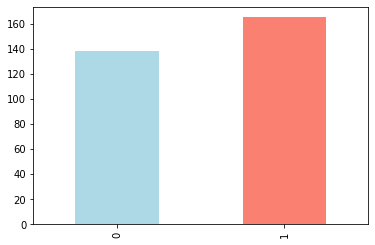

In [6]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Hearth Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<AxesSubplot:xlabel='target'>

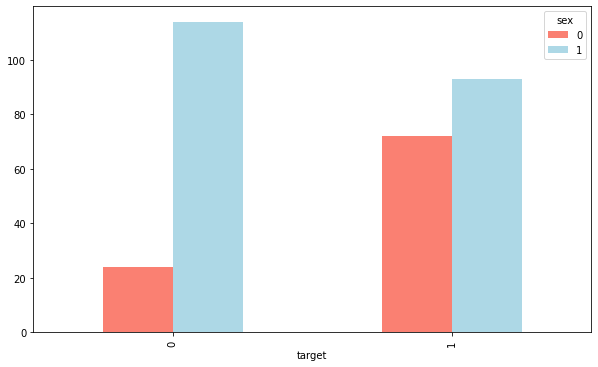

In [12]:
pd.crosstab(df.target, df.sex).plot(kind= 'bar', figsize= (10,6), color = ['salmon', 'lightblue'])

In [13]:
df['thalach'].value_counts() ## It gives all different value's counts

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

## Age vs Max Heart rage

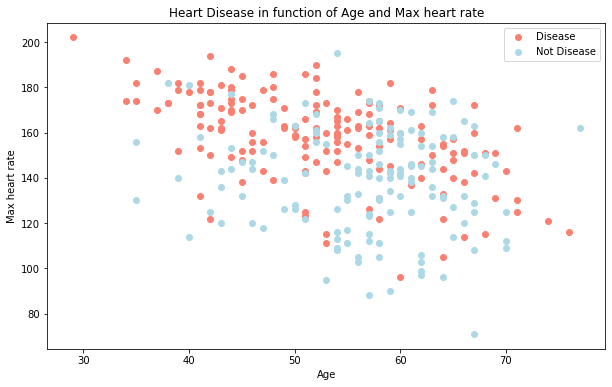

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c= 'salmon')
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = 'lightblue')

plt.title('Heart Disease in function of Age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'Not Disease'])

<AxesSubplot:ylabel='Frequency'>

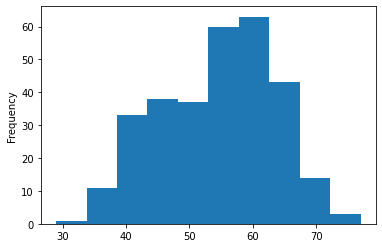

In [15]:
df.age.plot.hist()

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'Amount')

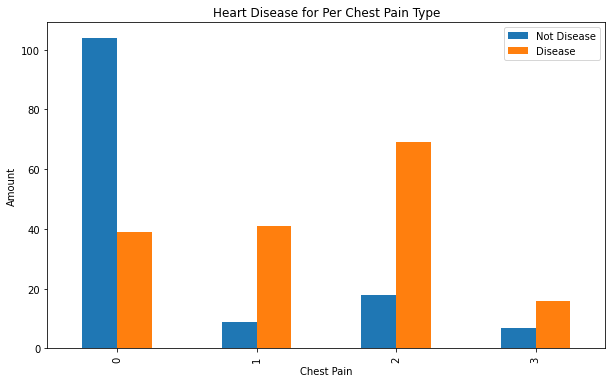

In [17]:
pd.crosstab(df.cp, df.target).plot(kind= 'bar', figsize= (10,6))
plt.title('Heart Disease for Per Chest Pain Type')
plt.legend(['Not Disease', 'Disease'])
plt.xlabel('Chest Pain')
plt.ylabel('Amount')

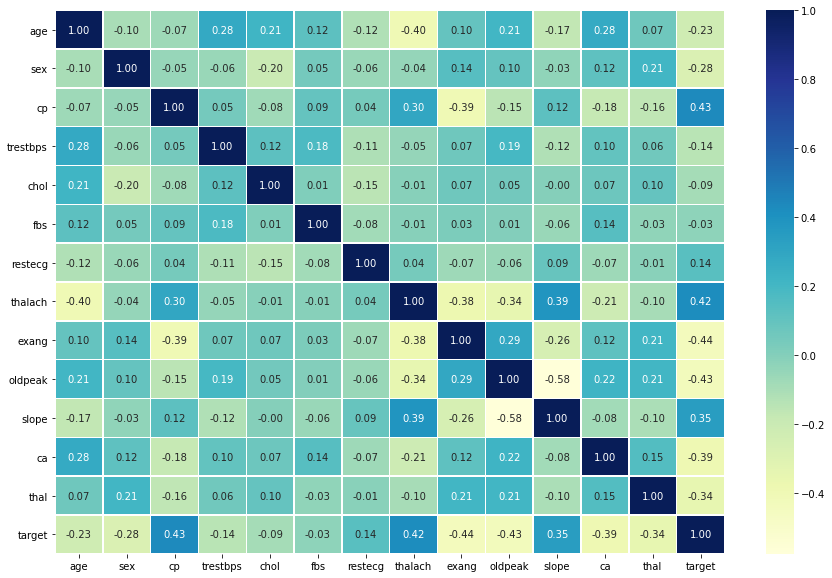

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths = 0.5,
                fmt = '.2f',
                cmap='YlGnBu')

## 5. Modelling 

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = df.drop('target', axis = 1)
y = df['target']

In [21]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

Now data has been splited, it is time do decide which machine learning technique we will use
1. Logisctic Regression
2. Kth Neighbors
3. RandomForest Classifier

In [22]:
models = {
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}


def createModel(models, X_train,X_test,y_train, y_test):
    
    for key in models.keys():
        models[key].fit(X_train, y_train)
        sc= models[key].score(X_test,y_test)
        models[key] = sc
    print(models)

createModel(models,X_train, X_test,y_train,y_test)
    
    
    
    



{'RandomForestClassifier': 0.7868852459016393, 'KNeighborsClassifier': 0.639344262295082, 'LogisticRegression': 0.8360655737704918}


C:\DataScienceProjects\milestone1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

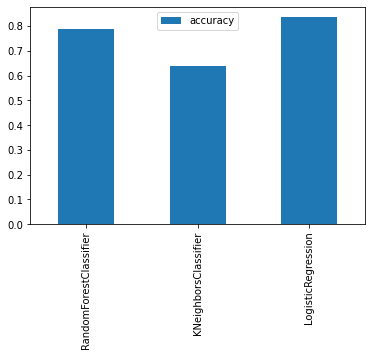

In [23]:
model_compare = pd.DataFrame(models, index =['accuracy'])
model_compare.T.plot.bar()

* Hyper Parameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* Roc Curve
* Area Under the curve

## Hyper Paramater Tuning

In [24]:
train_score = []
test_score = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
    


Text(0, 0.5, 'Score')

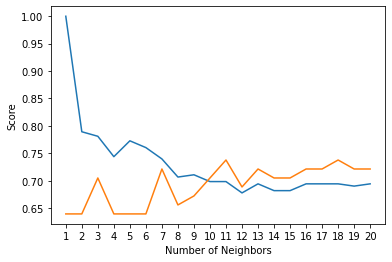

In [25]:
plt.plot(neighbors, train_score, label = 'train_score')
plt.plot(neighbors, test_score, label = 'test_score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')

## Hyper Paramater tuning with Randomized Search CV

## We are going to tune
* Logictic Regression
* RandomForestClassifier
.. using RandomizedSearchCV

In [26]:
# Logictic Regression hyperparameters
log_grid = {'solver':[ 'liblinear'],
           'penalty':['l2'],
           'C':  np.logspace(-4, 4, 20)}
# RandomForestClassifier hyperparameters

rf_grid = {
    'n_estimators' : [10, 100, 1000],
'max_features' : ['sqrt', 'log2']
}

In [27]:
# Tuning Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions= log_grid,
                               cv = 5,
                               n_iter = 15,
                               verbose = True)

rs_log_reg.fit(X_train, y_train)





Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}

In [29]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

In [30]:
## Grid Search with RandomForestClassifier
gr_rf = RandomizedSearchCV(RandomForestClassifier(),
                    param_distributions= rf_grid,
                               cv = 5,
                               n_iter = 15,
                               verbose = True)
gr_rf.fit(X_train, y_train)

C:\DataScienceProjects\milestone1\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=15. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 100, 1000]},
                   verbose=True)

In [31]:
gr_rf.best_params_

{'n_estimators': 100, 'max_features': 'sqrt'}

In [32]:
gr_rf.score(X_test,y_test)

0.8688524590163934

1. By Hand
2. RandomizedSearchCV
3. GridSearchCV

 ## ROC Curve

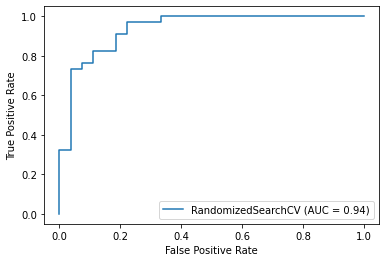

In [33]:
plot_roc_curve(rs_log_reg, X_test, y_test)

In [34]:
y_preds = rs_log_reg.predict(X_test)

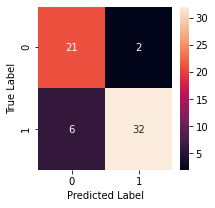

In [35]:
cm = confusion_matrix(y_preds, y_test)
def conf_matrix(test,predicted):
    fig, ax = plt.subplots(figsize= (3,3))
    ax = sns.heatmap(cm, annot= True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
conf_matrix(X_test,y_test)

In [36]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [37]:
# this report is just for one test split

## Calculating evaluation metrics using Cross Val score

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}

In [39]:
clf = LogisticRegression(C=0.23357214690901212, solver = 'liblinear' )

In [40]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv= 5, scoring= 'accuracy')
cv_acc = np.mean(cv_acc)

In [41]:
# Corss validated precision
cv_pre = cross_val_score(clf, X, y, cv= 5, scoring= 'precision')
cv_pre = np.mean(cv_pre)

In [42]:
# Cross validated f1 score
cv_f1 = cross_val_score(clf, X, y, cv= 5, scoring= 'f1')
cv_f1 = np.mean(cv_f1)

In [43]:
#Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv= 5, scoring= 'recall')
cv_recall = np.mean(cv_recall)

In [44]:
# Visiulaze Cross validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc, 'Precision':cv_pre, 'F1Score':cv_f1, 'Recall':cv_recall }, index = [0])

In [45]:
cv_metrics

,Accuracy,Precision,F1Score,Recall
0,0.847978,0.821587,0.87054,0.927273


<AxesSubplot:>

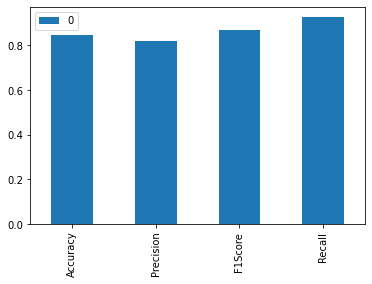

In [46]:
cv_metrics.T.plot.bar()

In [47]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [48]:
clf.coef_

array([[ 0.01189   , -0.96464898,  0.66232674, -0.01865446, -0.00230903,
         0.07966645,  0.19227601,  0.02975778, -0.59104866, -0.47444332,
         0.24128751, -0.52308488, -0.6137671 ]])

In [50]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.011890001341689525,
 'sex': -0.9646489765559294,
 'cp': 0.6623267435402934,
 'trestbps': -0.018654456502967875,
 'chol': -0.002309031465650532,
 'fbs': 0.07966645419618891,
 'restecg': 0.19227601156312704,
 'thalach': 0.02975777916648001,
 'exang': -0.591048663903565,
 'oldpeak': -0.4744433178305503,
 'slope': 0.24128750860352016,
 'ca': -0.5230848787210262,
 'thal': -0.6137670983242806}

<AxesSubplot:title={'center':'Feature Importance'}>

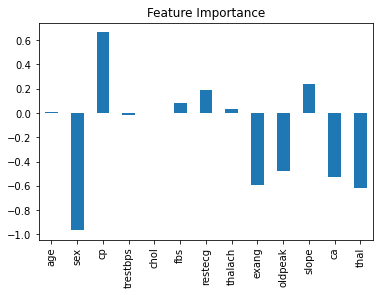

In [51]:
feature_df = pd.DataFrame(feature_dict, index= [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False)